In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Carregar dados
file_path = "C:/Users/Mathw/Downloads/Dados Históricos - Ibovespa (PTech) tratado.csv"
dados = pd.read_csv(file_path)


In [73]:
# Limpeza e transformação dos dados
# Converter a coluna Data para datetime
dados['Data'] = pd.to_datetime(dados['Data'], format='%d.%m.%Y')

In [88]:
dados.set_index('Data', inplace=True)

In [89]:
dados.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Variação Absoluta,Direção,Média,Volume Normalizado,Tendência Acumulada,Volatilidade
Data,,,,,,,,,,,,
2024-12-10,128.228,127.213,128.511,127.213,9.140000e+09,0.80,1.298,1,127.7205,7.756494,0.80,0.010203
2024-12-09,127.210,125.946,127.542,125.946,9.370000e+09,1.00,1.596,1,126.5780,7.954646,1.80,0.012672
2024-12-06,125.946,127.856,127.872,125.833,1.122000e+10,-1.50,2.039,0,126.9010,9.548477,0.30,0.015948
2024-12-05,127.858,126.088,127.989,126.087,9.530000e+09,1.40,1.902,1,126.9730,8.092491,1.70,0.015085
2024-12-04,126.087,126.139,126.720,125.828,9.390000e+09,-0.04,0.892,0,126.1130,7.971876,1.66,0.007072


In [75]:
# Remover caracteres de colunas numéricas
def limpar_valores(valor):
    
    if isinstance(valor, str):
        valor = valor.replace('.', '').replace(',', '.').replace('B', '').replace('%', '').strip()
    return float(valor)


In [76]:
# Remover caracteres de colunas numéricas
def limpar_valores(valor):
    
    if isinstance(valor, str):
        valor = valor.replace('.', '').replace(',', '.').replace('B', '').replace('%', '').strip()
    return float(valor)

colunas_numericas = ['Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%']
for coluna in colunas_numericas:
    dados[coluna] = dados[coluna].apply(limpar_valores)

In [77]:
# Engenharia de atributos
# Variação absoluta
dados['Variação Absoluta'] = dados['Máxima'] - dados['Mínima']

In [78]:
# Direção da variação
dados['Direção'] = dados['Var%'].apply(lambda x: 1 if x > 0 else 0)

In [79]:
# Média do índice no dia
dados['Média'] = (dados['Abertura'] + dados['Último']) / 2


In [80]:
# Normalização do volume
dados['Volume Normalizado'] = (dados['Vol.'] - dados['Vol.'].mean()) / dados['Vol.'].std()

In [81]:
# Tendência acumulada
dados['Tendência Acumulada'] = dados['Var%'].cumsum()

In [82]:
# Volatilidade intradiária
dados['Volatilidade'] = (dados['Máxima'] - dados['Mínima']) / dados['Abertura']

In [83]:
# Exibir informações básicas
def resumo_dados(dados):
    print("\nResumo dos Dados:")
    print(dados.info())
    print("\nEstatísticas Descritivas:")
    print(dados.describe())

resumo_dados(dados)


Resumo dos Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 2715 non-null   datetime64[ns]
 1   Último               2715 non-null   float64       
 2   Abertura             2715 non-null   float64       
 3   Máxima               2715 non-null   float64       
 4   Mínima               2715 non-null   float64       
 5   Vol.                 2714 non-null   float64       
 6   Var%                 2715 non-null   float64       
 7   Variação Absoluta    2715 non-null   float64       
 8   Direção              2715 non-null   int64         
 9   Média                2715 non-null   float64       
 10  Volume Normalizado   2714 non-null   float64       
 11  Tendência Acumulada  2715 non-null   float64       
 12  Volatilidade         2715 non-null   float64       
dtypes: datetime64[

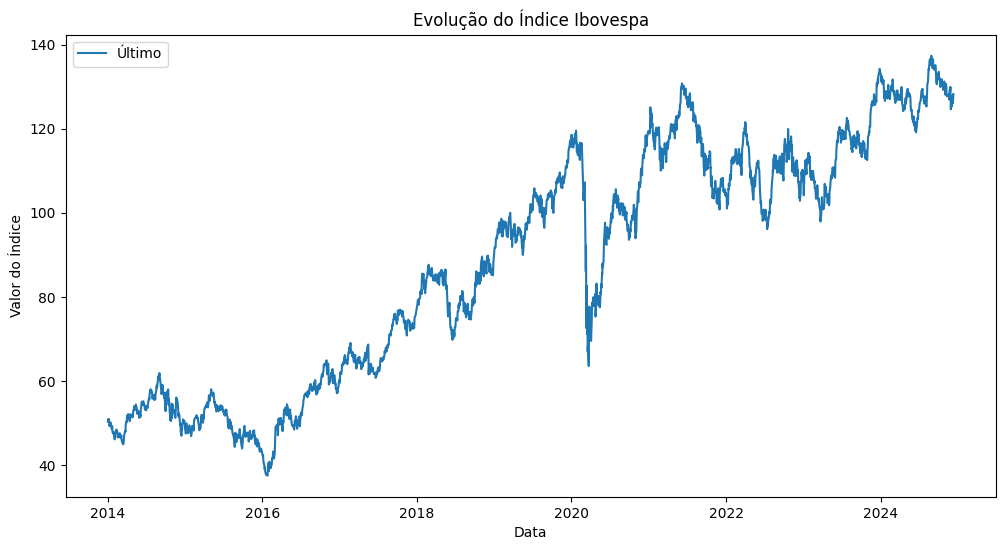

In [84]:
# Visualização de tendências
plt.figure(figsize=(12, 6))
plt.plot(dados['Data'], dados['Último'], label='Último')
plt.title('Evolução do Índice Ibovespa')
plt.xlabel('Data')
plt.ylabel('Valor do Índice')
plt.legend()
plt.show()

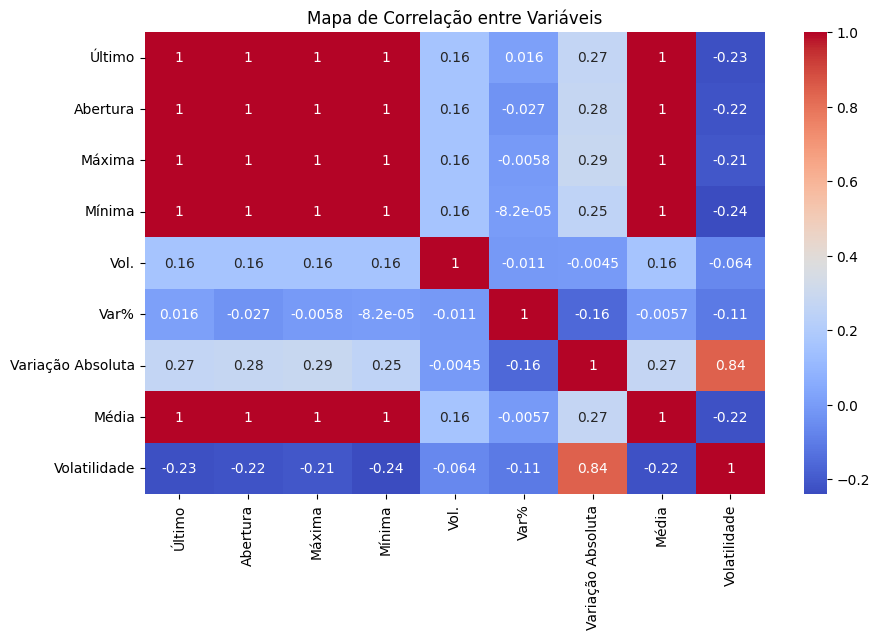

In [85]:
# Correlação entre variáveis
plt.figure(figsize=(10, 6))
sns.heatmap(dados[colunas_numericas + ['Variação Absoluta', 'Média', 'Volatilidade']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação entre Variáveis')
plt.show()


In [86]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 2715 non-null   datetime64[ns]
 1   Último               2715 non-null   float64       
 2   Abertura             2715 non-null   float64       
 3   Máxima               2715 non-null   float64       
 4   Mínima               2715 non-null   float64       
 5   Vol.                 2714 non-null   float64       
 6   Var%                 2715 non-null   float64       
 7   Variação Absoluta    2715 non-null   float64       
 8   Direção              2715 non-null   int64         
 9   Média                2715 non-null   float64       
 10  Volume Normalizado   2714 non-null   float64       
 11  Tendência Acumulada  2715 non-null   float64       
 12  Volatilidade         2715 non-null   float64       
dtypes: datetime64[ns](1), float64(11)